In [ ]:
# Pymaceuticals Inc.
---

### Analysis

The most significant observation that can be made from the drug regimen and mice tumor volume data is the strong and highly correlated relationship between mouse weight and tumor volume, as observed in the specific analysis of mice taking Capomulin. Overall there are a few inferences that can be drawn from the provided data set and the analysis of that data. Specifically (and ranked in order of significance):

- Observation #1: There is a strong and highly correlated predictive relationship between weight and tumor volume for mice on Capomulin.  The data doesn't give us insight into a possible causal relationship between taking Capomulin and any potential impacts on either weight or tumor volume. But with a 0.84% coefficient correlation and a 0.0000 p-value between the two attributes, it can be confidently be said that mouse weight predicts tumor volume using the regimen data provided for mice on Capomulin.

- Observation #2: Capomulin and Ramicane make have the most observed mice timepoints with approximately 5,000 for each of them; Propriva has the least at approximately 2,750 timepoints observed. The data provided cannot tell us about causal relationships between the drug regimens and # of timepoints (or size) for the study subjects. In this absence, we cannot make a firm conclusion of a cause for timepoint volume and drug use; however, further analysis and background information could help provide additional insight that would help potentially identify a causal relationship.

- Observation #3: The mice genders are nearly equally balanced between male and female mice with males slightly outnumbering (at 51% of total volume) females at 49%. This balance of subject gender indicates that any conclusions or recommendations drawn from analysis can be confidently applied to both genders.

 

In [1]:
#Step 1: Handle dependencies and setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

#2: Reference data files
mouse_metadata_path = "Mouse_metadata.csv"
study_results_path = "Study_results.csv"

#3: Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

#4: Combine datafile 1 "Mouse_metadata.csv" and datafile 2 "Study_results.csv"
#5: Display the data table for preview
merged_data = pd.merge(mouse_metadata, study_results, how='left', on=["Mouse ID", "Mouse ID"])
merged_data.head()


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
#6: Display the number of unique mice IDs in the data
total_merged_unique_ids = merged_data['Mouse ID'].nunique()
print(f"Total number of unique Mouse IDs in the merged dataset: {total_merged_unique_ids}")

Total number of unique Mouse IDs in the merged dataset: 249


In [3]:
#7: Our data should be uniquely identified by Mouse ID and Timepoint. Display the data associated with that mouse ID
unique_mice_by_timepoints = merged_data.drop_duplicates(subset=['Mouse ID', 'Timepoint'])
unique_mice_by_timepoints_sorted = unique_mice_by_timepoints.sort_values(by=['Mouse ID', 'Timepoint'])
display(unique_mice_by_timepoints_sorted)


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
454,a203,Infubinol,Female,20,23,0,45.000000,0
455,a203,Infubinol,Female,20,23,5,48.508468,0
456,a203,Infubinol,Female,20,23,10,51.852437,1
457,a203,Infubinol,Female,20,23,15,52.777870,1
458,a203,Infubinol,Female,20,23,20,55.173336,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [4]:
#8: Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. And then create a new DataFrame where this data is removed. Use this cleaned DataFrame for the remaining steps. 
duplicates = merged_data.duplicated(subset=['Mouse ID', 'Timepoint'], keep=False)
duplicate_timepoints = merged_data[duplicates]
unique_mouse_ids_with_duplicates = duplicate_timepoints['Mouse ID'].unique()
unique_mouse_ids_with_duplicates


array(['g989'], dtype=object)

In [5]:
#9 - Optional: Get all the data for the duplicate mouse ID. 


In [6]:
#10: Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleaned_data = merged_data[merged_data['Mouse ID'] !='g989']
sorted_cleaned_data = cleaned_data.sort_values(by='Metastatic Sites', ascending=False)
cleaned_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [7]:
#11: Checking the number of mice in the clean DataFrame.
total_unique_mouse_ids = cleaned_data['Mouse ID'].nunique()
total_unique_mouse_ids

248

## Summary Statistics

In [8]:
#11: Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

#Group data by "Drug Regimen"
tumor_by_drug = merged_data.groupby('Drug Regimen')
#Calculate the requested metrics
drug_regimen_calcs = tumor_by_drug['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std', 'sem']).reset_index()
#Rename columns for ease of reading
drug_regimen_calcs.columns = ['Drug Regimen', 'Mean Tumor Volume', 'Median Tumor Volume', 'Tumor Volume Variance', 'Tumor Volume Std. Dev', 'Tumor Volume SEM']
#Display the summary stats dataframe
drug_regimen_calcs

,Drug Regimen,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev,Tumor Volume SEM
0,Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
1,Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
2,Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
3,Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
4,Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
5,Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
6,Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
7,Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
8,Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111
9,Zoniferol,53.236507,51.818479,48.533355,6.966589,0.516398


## Bar and Pie Charts

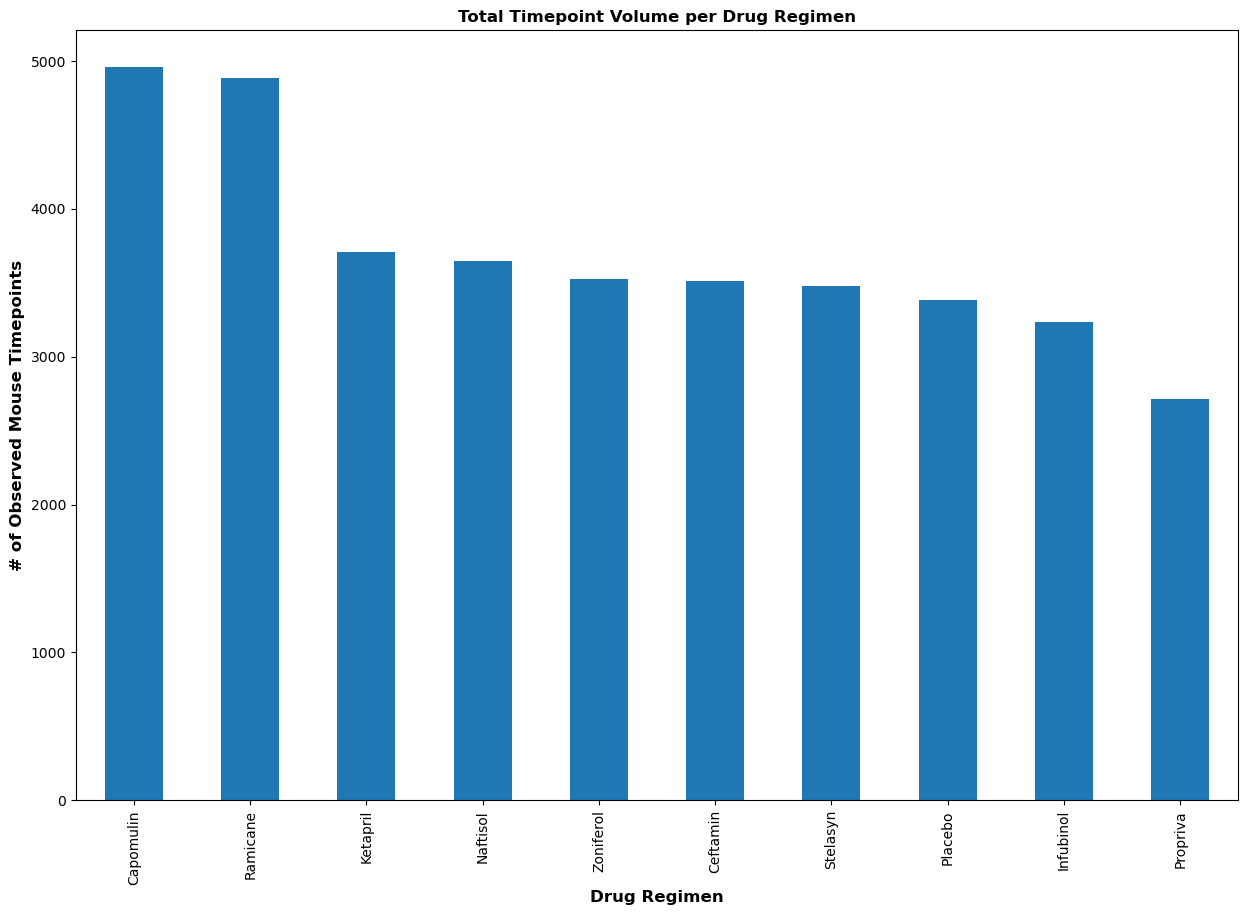

In [10]:
#12: Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
#Aggregate total timepoints by Mouse ID and Drug Regimen using PyPlo
total_timepoints_per_mouse = merged_data.groupby(['Drug Regimen', 'Mouse ID'])['Timepoint'].sum().reset_index()
#Sum the total timepoints for each Drug Regimen
total_timepoints_per_drug = total_timepoints_per_mouse.groupby('Drug Regimen')['Timepoint'].sum().reset_index()
#Sort the resulting summary data by total timepoint volume
total_timepoints_per_drug_sorted = total_timepoints_per_drug.sort_values(by='Timepoint', ascending=False)
#Create the bar chart using Pandas
bar_chart = total_timepoints_per_drug_sorted.plot(kind='bar',
                                                  x='Drug Regimen',
                                                  figsize=(15,10),
                                                  legend=False,
                                                  title='Total Timepoints by Drug Regimen')

bar_chart.set_xlabel('Drug Regimen', fontweight='bold', fontsize=12)
bar_chart.set_ylabel('# of Observed Mouse Timepoints', fontweight='bold', fontsize=12)
bar_chart.set_title('Total Timepoint Volume per Drug Regimen', fontweight='bold', fontsize=12)
bar_chart.tick_params(axis='x', rotation=90)

                                                  

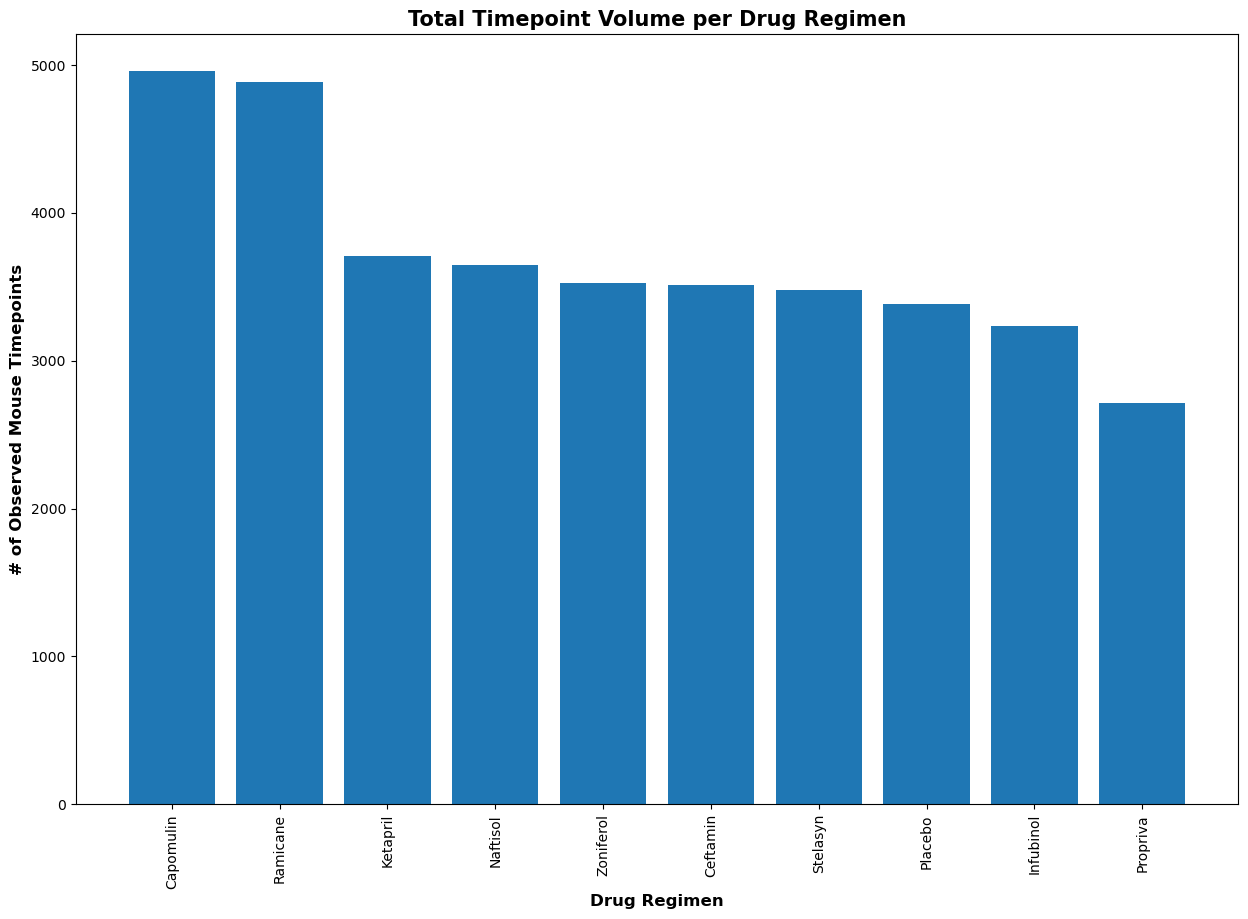

In [11]:
#13: Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
#Aggregate total timepoints by Mouse ID and Drug Regimen using PyPlo
total_timepoints_per_mouse = merged_data.groupby(['Drug Regimen', 'Mouse ID'])['Timepoint'].sum().reset_index()
#Sum the total timepoints for each Drug Regimen
total_timepoints_per_drug = total_timepoints_per_mouse.groupby('Drug Regimen')['Timepoint'].sum().reset_index()
#Sort the resulting summary data by total timepoint volume
total_timepoints_per_drug_sorted = total_timepoints_per_drug.sort_values(by='Timepoint', ascending=False)
#Create the bar chart using PyPlot
plt.figure(figsize=(15, 10))
plt.bar(total_timepoints_per_drug_sorted['Drug Regimen'], total_timepoints_per_drug_sorted['Timepoint'])
plt.title('Total Timepoint Volume per Drug Regimen', fontweight='bold', fontsize=15)
plt.xlabel('Drug Regimen', fontweight='bold', fontsize=12)
plt.ylabel('# of Observed Mouse Timepoints', fontweight='bold', fontsize=12)
plt.xticks(rotation=90)
plt.show()

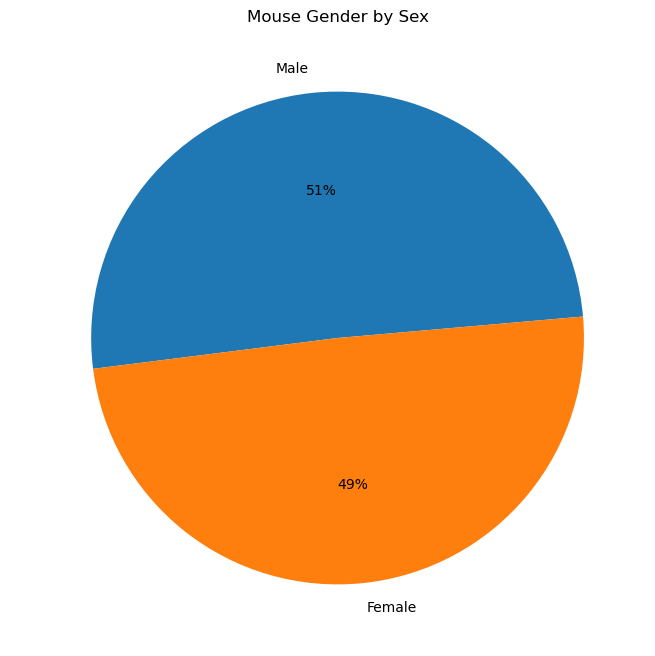

In [12]:
#14: Generate a pie plot showing the distribution of female versus male mice using Pandas
#Define the mouse_sex_pie_chart using Pandas (".plot")
mouse_gender_mix = merged_data['Sex'].value_counts()

#Create the pie chart using Pandas
pie_chart = mouse_gender_mix.plot(kind='pie',
                                figsize=(8, 8),
                                autopct='%1.0f%%',
                                startangle=5,
                                title='Mouse Gender by Sex')

pie_chart.set_ylabel(' ')

plt.show()

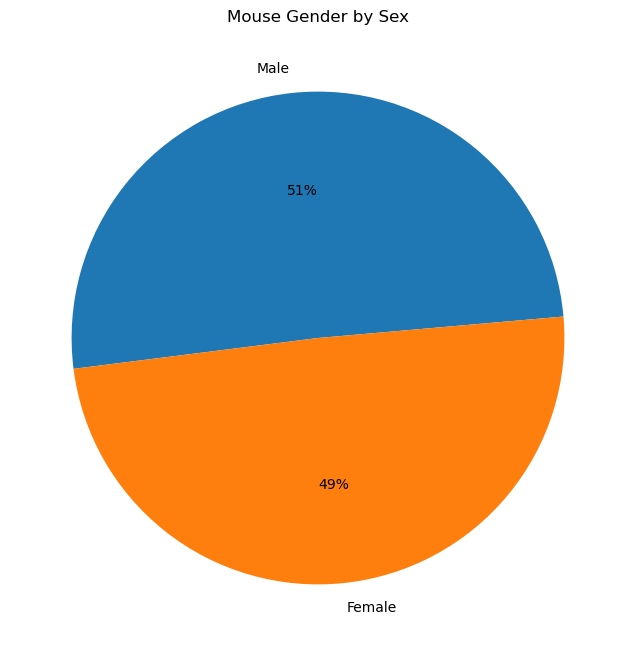

In [13]:
#15 Generate a pie plot showing the distribution of female versus male mice using pyplot (".plt")
#Count the occurences of mouse gender in the data (same as 
mouse_sex_mix = merged_data['Sex'].value_counts()

#Create the pie chart using PyPlot
plt.figure(figsize=(8, 8))
plt.pie(mouse_sex_mix, labels=mouse_sex_mix.index, autopct='%1.0f%%', startangle=5)
plt.title("Mouse Gender by Sex")
plt.show()

## Quartiles, Outliers and Boxplots

In [14]:
#16: Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Start by getting the last (greatest) timepoint for each mouse
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
max_timepoint_by_mouse = merged_data.groupby('Mouse ID')['Timepoint'].max().reset_index()
merged_data_max_timepoint = pd.merge(max_timepoint_by_mouse, merged_data, on=['Mouse ID', 'Timepoint'], how='left')
subset_regimens = merged_data_max_timepoint[merged_data_max_timepoint['Drug Regimen'].isin(['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin'])].copy()
bins = [0, 11.25, 22.5, 33.75, 45]
bin_labels = ['0-11', '12-22', '23-33', '34-45']
subset_regimens['Timepoint_Bin'] = pd.cut(subset_regimens['Timepoint'], bins=bins, labels=bin_labels, include_lowest=True)
print(subset_regimens)


    Mouse ID  Timepoint Drug Regimen     Sex  Age_months  Weight (g)  \
0       a203         45    Infubinol  Female          20          23   
1       a251         45    Infubinol  Female          21          25   
3       a275         45     Ceftamin  Female          20          28   
6       a411         45     Ramicane    Male           3          22   
7       a444         45     Ramicane  Female          10          25   
..       ...        ...          ...     ...         ...         ...   
239     y769         45     Ceftamin  Female           6          27   
240     y793         45    Capomulin    Male          17          17   
241     y865         45     Ceftamin    Male          23          26   
245     z578         45     Ramicane    Male          11          16   
246     z581         45    Infubinol  Female          24          25   

     Tumor Volume (mm3)  Metastatic Sites Timepoint_Bin  
0             67.973419                 2         34-45  
1             65.52

In [15]:
#17: QA calculations
#filter data for specific drug regimens requested
filtered_data = merged_data[merged_data['Drug Regimen'].isin(['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin'])]
#group and aggregate data for max timepoint calc confirmation
max_timepoint_per_regimen = filtered_data.groupby(['Mouse ID', 'Drug Regimen'])['Timepoint'].max().reset_index()
detailed_max_timepoints = pd.merge(max_timepoint_per_regimen, merged_data, on=['Mouse ID', 'Drug Regimen', 'Timepoint'], how='inner')
print(max_timepoint_per_regimen.describe())
print("Unique mice in filtered data:", filtered_data['Mouse ID'].nunique())
print("Unique mice in max timepoint data:", max_timepoint_per_regimen['Mouse ID'].nunique())

        Timepoint
count  100.000000
mean    35.700000
std     14.442852
min      0.000000
25%     30.000000
50%     45.000000
75%     45.000000
max     45.000000
Unique mice in filtered data: 100
Unique mice in max timepoint data: 100


In [16]:
# Calculate the IQR and quantitatively determine if there are any potential outliers.   
    # Locate the rows which contain mice on each drug and get the tumor volumes  
    # add subset 
    # Determine outliers using upper and lower bounds
# Put treatments into a list for for loop (and later for plot labels)
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
# Create empty list to fill with tumor vol data (for plotting)
tumor_volume_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers.   
    # Locate the rows which contain mice on each drug and get the tumor volumes 
    #For loop allows us to cycle through each row in the df to determine if the mice are using our drugs or not
for regimen in treatments:
    # Locate the rows which contain mice on each drug and get the tumor volumes, create a subset to hold the final tumor volume
    final_tumor_volume = subset_regimens.loc[subset_regimens['Drug Regimen'] == regimen, 'Tumor Volume (mm3)']
    
    # Add the new subset to the tumor_volume_data list allowing us to summarize all mice using our drugs in one new list for visualization
    tumor_volume_data.append(final_tumor_volume)#doing this adds new final_tumor_volume subset into original tumor_volume_data
    
     # Determine outliers using upper and lower bounds
    quartiles = final_tumor_volume.quantile([.25, .5, .75]) #use Quantile to define quartile, apply to final tumor volume list
    lowerq = quartiles[0.25] #"Q1"
    upperq = quartiles[0.75] #"Q2"
    iqr = upperq - lowerq #IQR calc, subtracting Q1 from Q3 ("upperq-lowerq")
    
    lower_bound = lowerq - (1.5 * iqr) #provides space below expected norm to find outliers
    upper_bound = upperq + (1.5 * iqr) #provides space above expected norm to find outliers
    
    #Locate any potential outliers
    outliers = final_tumor_volume.loc[(final_tumor_volume < lower_bound) | (final_tumor_volume > upper_bound)] #use of "|" allows for search for outliers above OR below expected bounds, i.e. calculates upper/lower bounds
    
    #Print the results
    print(f"{regimen}'s potential outliers: {outliers}") #{regimen}=injects f string output with filtered treatments {outliers} injects string with results of outlier calc/search




Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


## Line and Scatter Plots

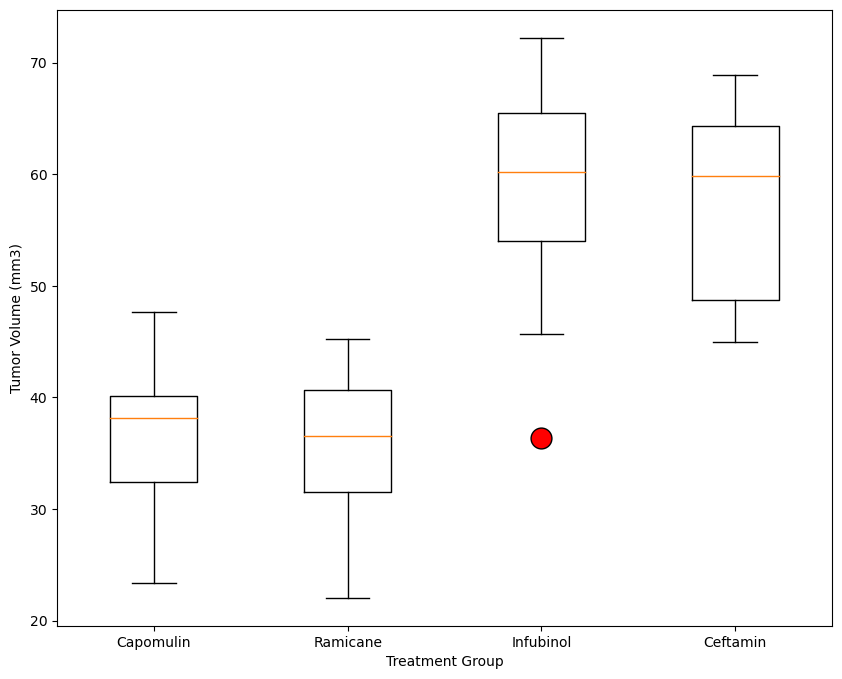

In [17]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.

plt.figure(figsize=(10, 8))  #set the figure size
flierprops = dict(marker='o', color='black', markersize=15, markerfacecolor='red')#use flierprops dictionary to format outlier circle for "Infubinol"
plt.boxplot(tumor_volume_data, labels=treatments, flierprops=flierprops)#tumor_volume_data references combined original data frame + new final_tumor_volume subset
plt.ylabel('Tumor Volume (mm3)')
plt.xlabel('Treatment Group')
plt.show()


<function matplotlib.pyplot.show(close=None, block=None)>

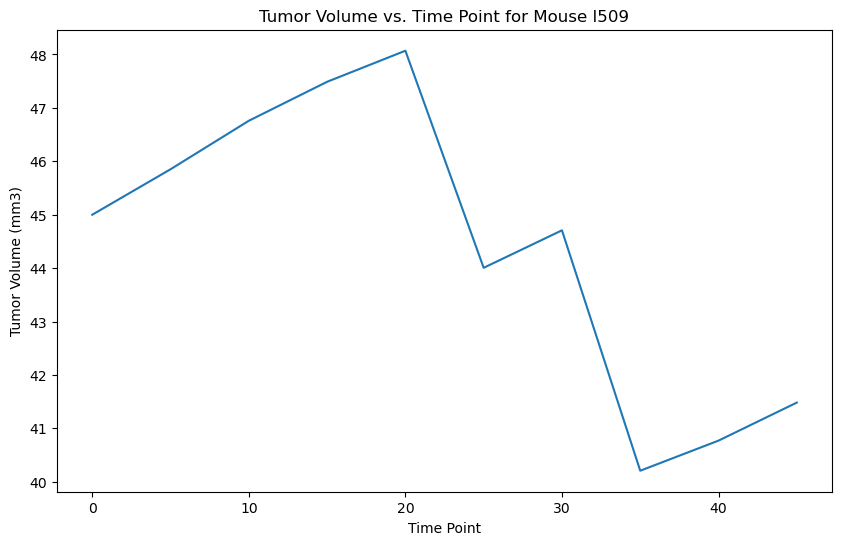

In [18]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
#Reference step #17 for filtering to mouse ID #1509 treated with Capomulin
mouse_id = 'l509' #declare the specific mouse ID I'm interested in

mouse_data = merged_data[merged_data['Mouse ID'] == mouse_id] #extract all data from original dataframe for mouse ID #i509

mouse_data = mouse_data.sort_values('Timepoint') #order records by timepoint size

#Generate the chart
plt.figure(figsize=(10, 6)) #define the figure sizes
plt.plot(mouse_data['Timepoint'], mouse_data['Tumor Volume (mm3)'], linestyle='-')
plt.title(f'Tumor Volume vs. Time Point for Mouse {mouse_id}')
plt.xlabel('Time Point')
plt.ylabel('Tumor Volume (mm3)')
plt.show

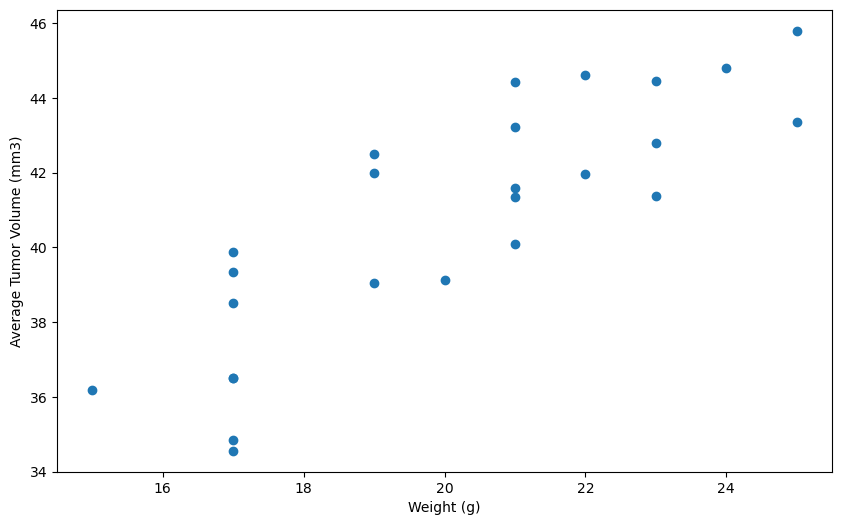

In [19]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
#Reference step #16, need to calculate new average observed tumor volume for the entire filtered (to only) Capomulin regimen (all mouse IDs)
#Create a new "capomulin_data" variable to filter for Capomulin regimen
capomulin_data = merged_data[merged_data['Drug Regimen'] == 'Capomulin']

#Create new dataframe, "grouped_data" to hold new filtered and calculated (mean/average) data. Group by Mouse ID, calculate average tumor volume, and get mouse weight (assuming it's constant per mouse)
grouped_data = capomulin_data.groupby('Mouse ID').agg({'Tumor Volume (mm3)': 'mean', 'Weight (g)': 'mean'}).reset_index()

#Create the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(grouped_data['Weight (g)'], grouped_data['Tumor Volume (mm3)'])
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()


## Correlation and Regression

In [20]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
#Reference step immediately above with new "grouped_data" df / average observed tumor volume doing new correlation coefficient and linear regression model
from scipy.stats import pearsonr, linregress

#calculate correlation coeeficient using Pearson's R correlation method
correlation_coefficient, p_value = pearsonr(grouped_data['Weight (g)'], grouped_data['Tumor Volume (mm3)'])
print(f"The correlation coefficient between mouse weight and average tumor volume is: {correlation_coefficient}")
print(f"The p-value is: {p_value:.4f}")



The correlation coefficient between mouse weight and average tumor volume is: 0.841936342469472
The p-value is: 0.0000


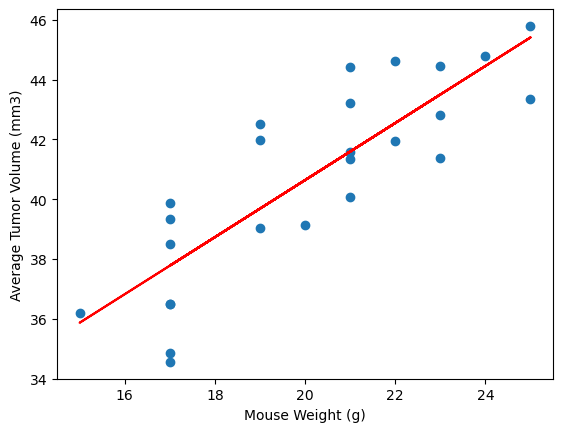

In [21]:
#fit the linear regression model
(slope, intercept, r_value, _, _) = linregress(grouped_data['Weight (g)'], grouped_data['Tumor Volume (mm3)'])
# Create a range of weights for predictions
weight_range = grouped_data['Weight (g)']

# Calculate the corresponding tumor volumes using the linear model
predicted_tumor_volume = slope * weight_range + intercept

# Scatter plot
plt.scatter(grouped_data['Weight (g)'], grouped_data['Tumor Volume (mm3)'])
# Regression line
plt.plot(weight_range, predicted_tumor_volume, color='red')
plt.xlabel('Mouse Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()
